## Importing Packages and data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from datetime import datetime
import folium


In [24]:
data=pd.read_csv(r'Hotel_Reviews.csv')

## Preliminary Analysis of data

In [25]:
data.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [26]:
data.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [27]:
print('There are' + ' ' + str(data.shape[0])+' '+ 'rows')
print('There are' + ' ' + str(data.shape[1])+' '+ 'columns')

There are 515738 rows
There are 17 columns


In [28]:
cat_cols=[]
num_cols = []
for col in data.columns:
    if data[col].dtype == object:
        cat_cols.append(col)
    else:
        num_cols.append(col)
        
num_cols=['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given']

In [29]:
#Printing out Hotels having very high average score
data[data.Average_Score >= 9][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:20]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192
483570,Hotel Berna,9.2,4017
464405,Hotel Stefanie,9.1,3883
96177,citizenM London Bankside,9.1,3802
100530,Mondrian London,9.1,3611
418909,art otel Amsterdam,9.0,3158


<AxesSubplot:xlabel='Reviewer_Score'>

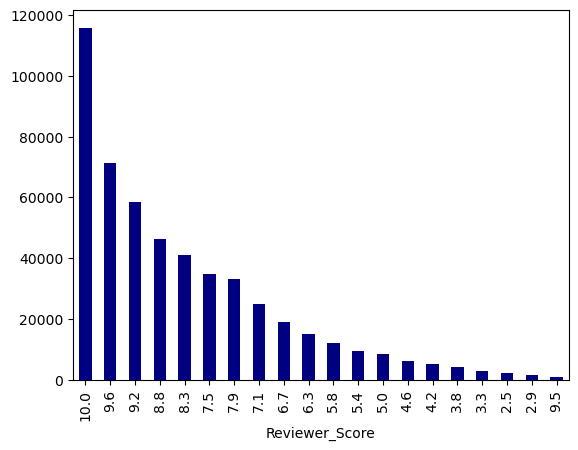

In [30]:
#Navy color as a more catchy color as well as showing neutrality as none of the graphs shows explicitely good or bad thing
#Reviewer score has values not exceeding 10 and majority in out data have high score
data['Reviewer_Score'].value_counts().head(20).plot.bar(color='navy')

In [31]:
#Analysis of best and worst hotels in terms of average score

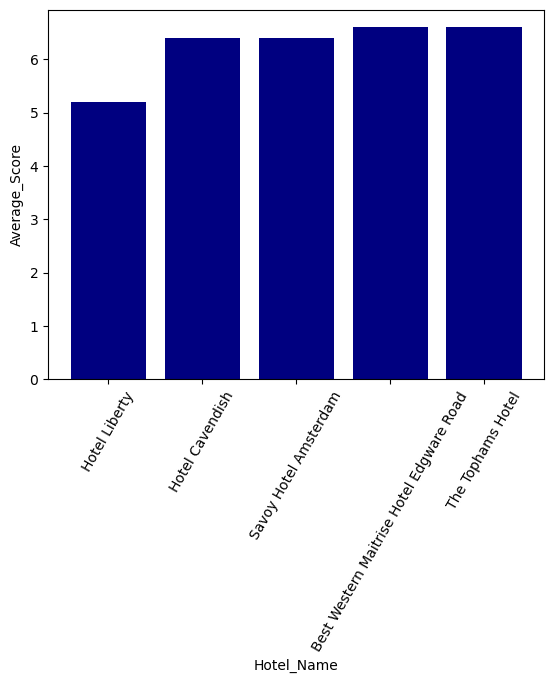

In [32]:
grouped_hotel_score=data.groupby(['Hotel_Name'])['Average_Score'].mean().reset_index().sort_values(by=['Average_Score']).head(5)
top5_hotels=grouped_hotel_score[['Hotel_Name']]                                                                                                                          
plt.bar(grouped_hotel_score['Hotel_Name'], grouped_hotel_score['Average_Score'],color='navy')
plt.xticks(rotation=60)
plt.xlabel('Hotel_Name')
plt.ylabel('Average_Score')
plt.show()

In [33]:
top5_hotels

,Hotel_Name
678,Hotel Liberty
600,Hotel Cavendish
1233,Savoy Hotel Amsterdam
141,Best Western Maitrise Hotel Edgware Road
1401,The Tophams Hotel


In [34]:
top5_df=data[data['Hotel_Name'].isin(top5_hotels['Hotel_Name'].tolist())]

In [35]:
top5_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
129781,28 Ebury Street Westminster Borough London SW1...,60,7/20/2017,6.6,The Tophams Hotel,United Kingdom,Room was covered in damp missing wallpaper li...,40,411,Location,2,2,3.8,"[' Leisure trip ', ' Couple ', ' Double Room '...",14 days,51.495744,-0.147753
129782,28 Ebury Street Westminster Borough London SW1...,60,7/16/2017,6.6,The Tophams Hotel,United Kingdom,On arrival my friend and I thought that the l...,99,411,The reception area and dining room were very ...,11,5,6.3,"[' Leisure trip ', ' Group ', ' Twin Room ', '...",18 days,51.495744,-0.147753
129783,28 Ebury Street Westminster Borough London SW1...,60,7/12/2017,6.6,The Tophams Hotel,Netherlands,I booked two rooms with twin beds On arrival ...,74,411,Located quite near Victoria station,7,16,5.0,"[' Leisure trip ', ' Family with young childre...",22 days,51.495744,-0.147753
129784,28 Ebury Street Westminster Borough London SW1...,60,7/9/2017,6.6,The Tophams Hotel,Philippines,The elevator is broken and the room is soooo ...,19,411,The location is very good and there are plent...,16,2,6.7,"[' Leisure trip ', ' Family with young childre...",25 days,51.495744,-0.147753
129785,28 Ebury Street Westminster Borough London SW1...,60,6/27/2017,6.6,The Tophams Hotel,Canada,air con faulty no shower door water all over ...,29,411,location,2,7,7.9,"[' Leisure trip ', ' Couple ', ' Lower Ground ...",37 days,51.495744,-0.147753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494851,Viale Bligny 56 Milan City Center 20136 Milan ...,26,10/5/2015,5.2,Hotel Liberty,South Africa,It feels like a 2 star hotel masquerading as ...,14,465,No Positive,0,6,3.8,"[' Leisure trip ', ' Couple ', ' Double Room '...",668 day,45.450867,9.194866
494852,Viale Bligny 56 Milan City Center 20136 Milan ...,26,10/1/2015,5.2,Hotel Liberty,Australia,Air con was ineffective so it was pretty warm...,19,465,Quiet area good breakfast and nice clean hotel,10,16,7.5,"[' Leisure trip ', ' Solo traveler ', ' Double...",672 day,45.450867,9.194866
494853,Viale Bligny 56 Milan City Center 20136 Milan ...,26,9/24/2015,5.2,Hotel Liberty,France,pas de chaines internationales,5,465,No Positive,0,2,7.1,"[' Leisure trip ', ' Couple ', ' Double Room '...",679 day,45.450867,9.194866
494854,Viale Bligny 56 Milan City Center 20136 Milan ...,26,9/10/2015,5.2,Hotel Liberty,United Arab Emirates,Ac not good,4,465,V friendly staff,4,9,6.3,"[' Leisure trip ', ' Group ', ' Double Room ',...",693 day,45.450867,9.194866


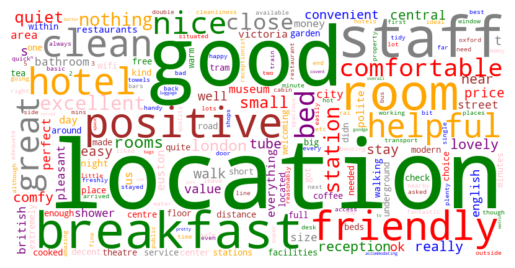

In [36]:
#More vivid coloring vor words taht occured more compared to the others.
from random import randint

text = top5_df['Positive_Review'].str.lower().str.replace('[^a-zA-Z\s]+', '')
words = text.str.split()
filtered_words = words.apply(lambda x: [word for word in x if word not in STOPWORDS])
word_freq = pd.Series(filtered_words.sum()).value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
colors = ["red", "green", "blue", "purple", "orange", "pink", "brown", "gray"]
wordcloud.recolor(color_func=lambda *args, **kwargs: colors[randint(0, len(colors)-1)])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


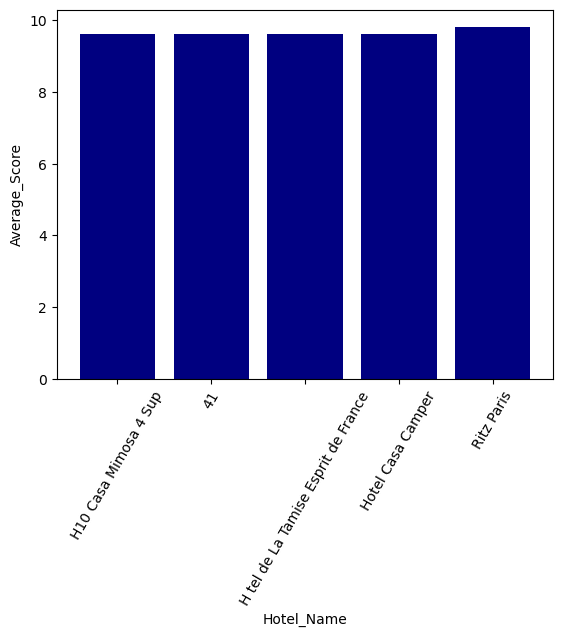

In [37]:
grouped_hotel_score=data.groupby(['Hotel_Name'])['Average_Score'].mean().reset_index().sort_values(by=['Average_Score']).tail(5)
lowest5_hotels=grouped_hotel_score[['Hotel_Name']]                                                                                                                          
plt.bar(grouped_hotel_score['Hotel_Name'], grouped_hotel_score['Average_Score'],color='navy')
plt.xticks(rotation=60)
plt.xlabel('Hotel_Name')
plt.ylabel('Average_Score')
plt.show()

In [38]:
lowest5_hotels_df=data[data['Hotel_Name'].isin(lowest5_hotels['Hotel_Name'].tolist())]

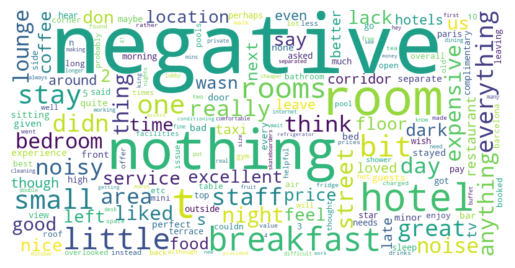

In [39]:
text = lowest5_hotels_df['Negative_Review'].str.lower().str.replace('[^a-zA-Z\s]+', '')
words = text.str.split()
filtered_words = words.apply(lambda x: [word for word in x if word not in STOPWORDS])
word_freq = pd.Series(filtered_words.sum()).value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


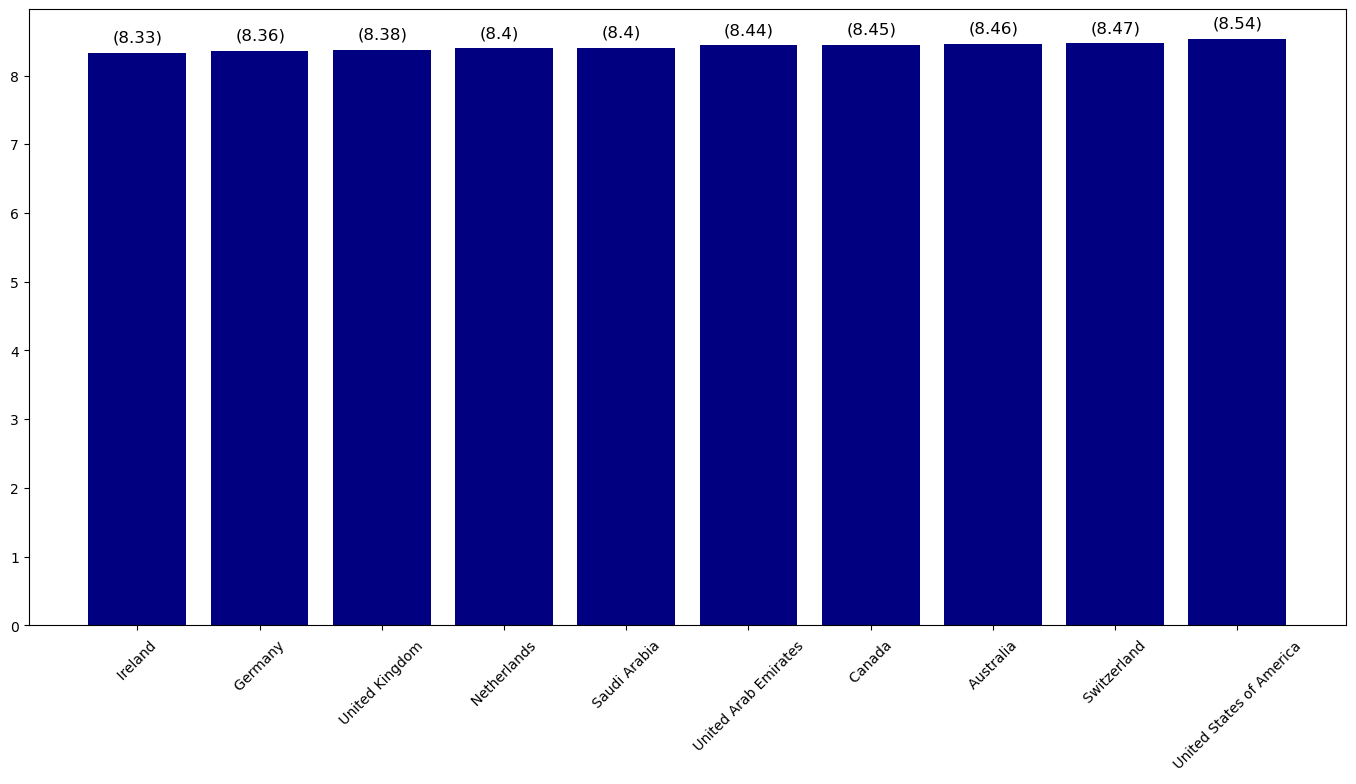

In [40]:
#Analysing the nationality of reviewers
#Taking top 10 countries in terms of number of reviewers so that we have significant number of observations 
#for calculating mean
top10=data['Reviewer_Nationality'].value_counts().head(10).index.tolist()
data_top10=data[data['Reviewer_Nationality'].isin(top10)]
data_2 = data_top10.groupby(['Reviewer_Nationality'], as_index=False).mean('Average_Score')
data_2.sort_values('Average_Score',ascending=False)
xAx=data_2.sort_values('Average_Score',ascending=True)['Reviewer_Nationality'].head(10)
yAx=data_2.sort_values('Average_Score',ascending=True)['Average_Score'].head(10)
plt.figure(figsize=(17,8))
plt.bar(xAx,yAx,color='navy')
plt.xticks(rotation = 45)
x=0.0
for xItem, yItem in zip(xAx,yAx):
    
    plt.text(x-0.2,yItem+0.22, '({})'.format(round(yItem,2)),fontsize=12,
             verticalalignment='center')
    x=x+1

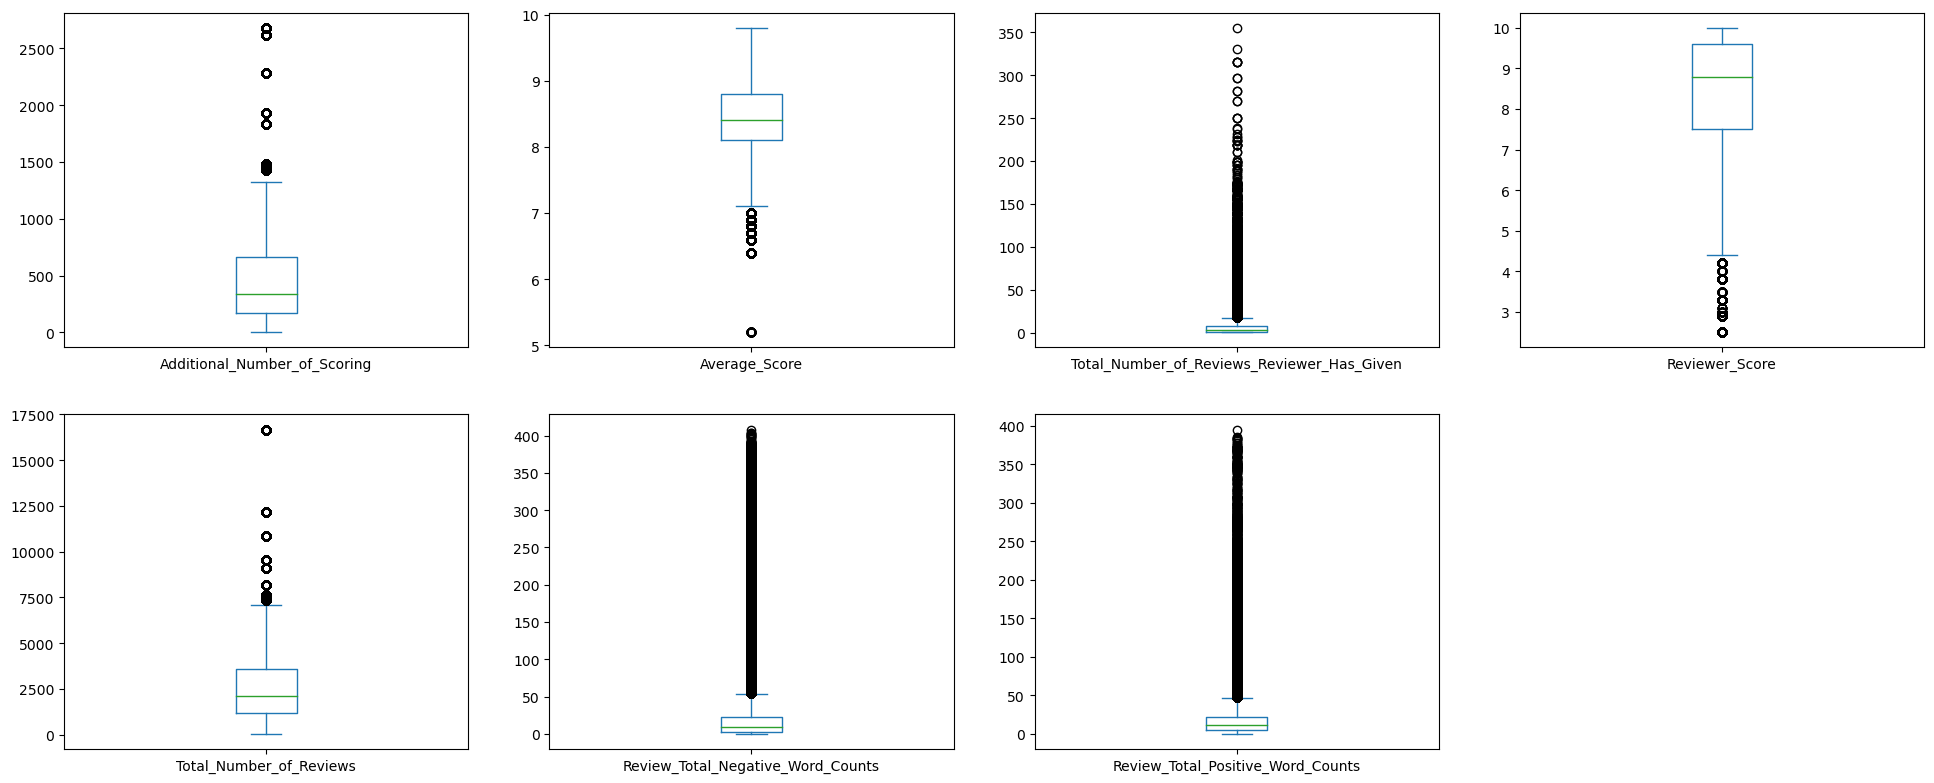

In [41]:
#Boxplots to see some outliers
data[['Additional_Number_of_Scoring','Average_Score',
    'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].plot(kind = "box" , subplots = True , figsize = (24,20) ,  layout = (4,4))
plt.show()

In [45]:
data.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [ ]:
sns.heatmap(data.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={"size": 9})


<AxesSubplot:>

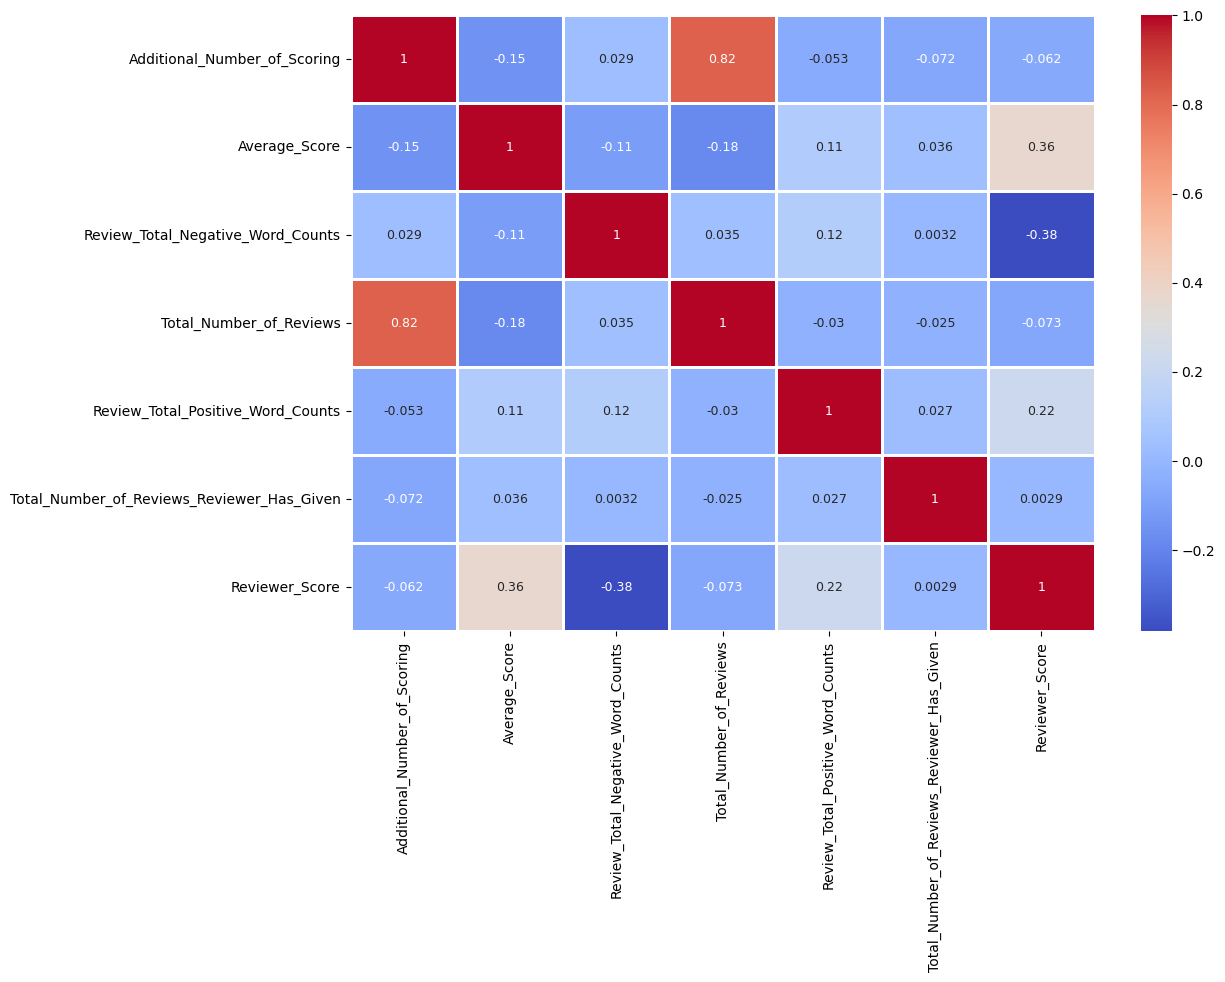

In [48]:
#Correlation heatmap of the variables, there is high correlation between additional number of scoring and total number of reviews
plt.figure(figsize=(12,8))
sns.heatmap(data[[ 'Additional_Number_of_Scoring',
       'Average_Score',
       'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score']].corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})

In [49]:
data['hotel_city']=data['Hotel_Address'].apply(lambda x: x.split()[-2])
data['hotel_country']=data['Hotel_Address'].apply(lambda x: x.split()[-1])

In [50]:
data['hotel_country'].isna().sum()

0

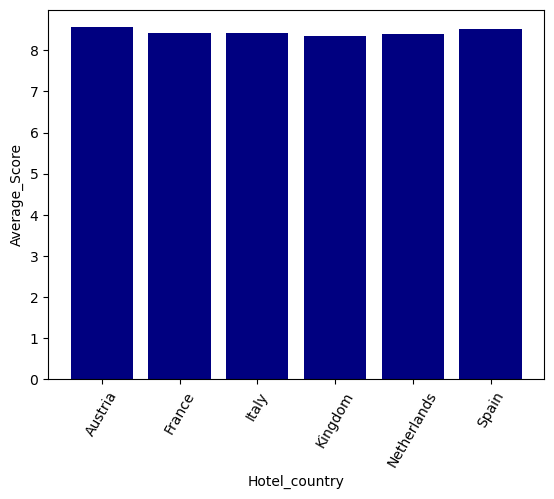

In [51]:
#No significant difference between countries
grouped=data.groupby(['hotel_country'])['Average_Score'].mean().reset_index()                                                                                                                      
plt.bar(grouped['hotel_country'],grouped['Average_Score'],color='navy')
plt.xticks(rotation=60)
plt.xlabel('Hotel_country')
plt.ylabel('Average_Score')
plt.show()

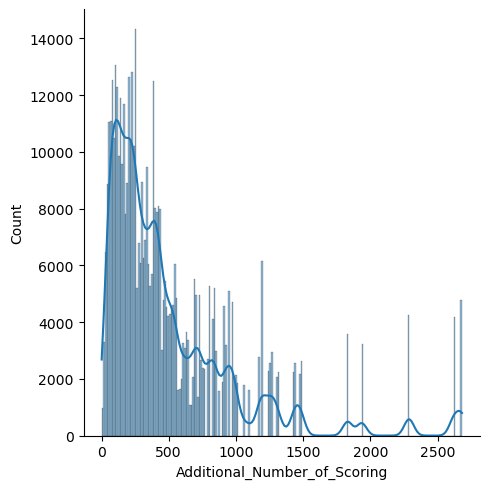

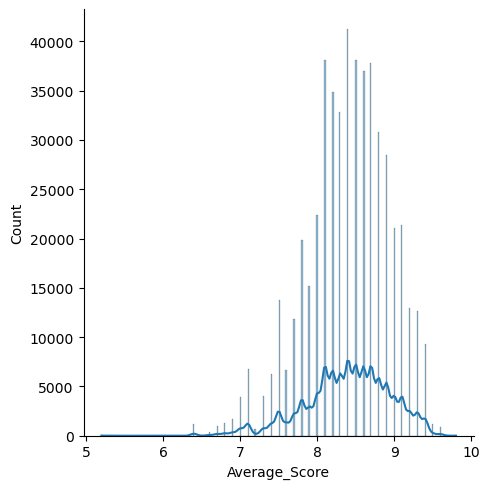

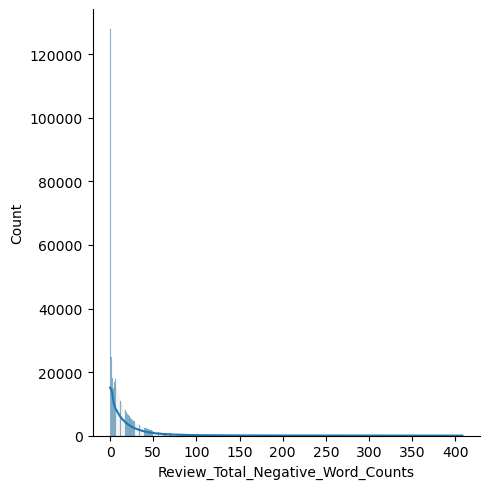

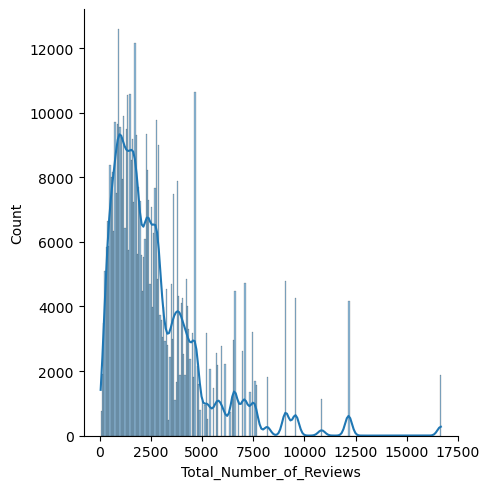

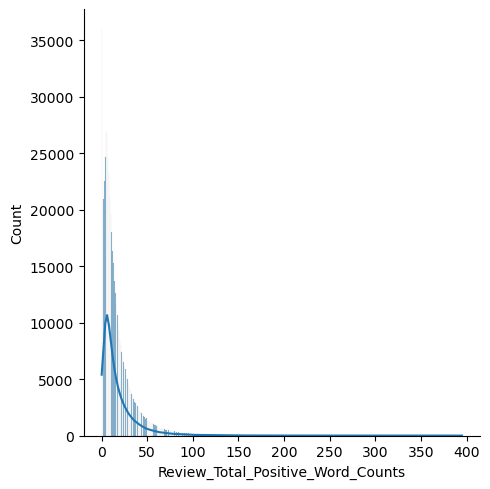

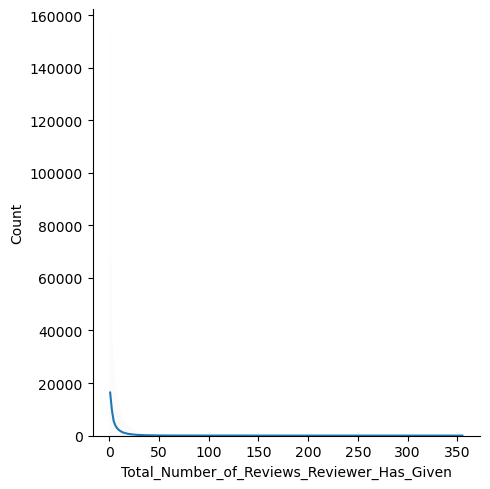

In [58]:
for col in num_cols:
    sns.displot(data[col], kde=True)
    plt.show()